In [ ]:
# Exploration
# An agent primarily improves its knowledge about each activity by gathering more information to make best  overall actions.

# Exploitation
# An agent aims at more rewards based on the estimated value (greedy) and then the agent makes decision based on current information



#Epsilon-Greedy Policy

In [ ]:
# The Epsilon-Greedy policy is a popular approach used in ad optimization, a common application of multi-arm bandit algorithms in the field of advertising.
# In this context, the goal is to maximize the click-through rate (CTR) or any other relevant metric for the ads displayed to users.

# Here's a simple explained example of how the Epsilon-Greedy policy works in ad optimization:

# Let's say you are running an online advertising platform, and you have 5 different ad variations (arms) that you want to test.
# Each ad variation corresponds to a different design or message, and you want to determine which ad performs the best in terms of getting clicks from users.

# Initialization: At the beginning of the experiment, you have no information about which ad performs best.
# So, you set the initial value of epsilon, ε (the exploration rate), to a high value, say 0.9.
# This means you will explore 90% of the time and exploit the best-performing ad only 10% of the time.

# Experimentation: You start displaying the 5 ad variations to different users in a random order.
# When a user visits your platform, you randomly select an ad to show them based on the current value of ε.

# Exploration Phase: With a high value of ε, you focus on exploring different ad variations.
# This means you show each ad almost equally to different users. During this phase, you gather data on how each ad performs in terms of clicks.

# Exploitation Phase: As the experiment progresses, you start to get an idea of which ad performs better based on the data collected so far.
# The Epsilon-Greedy policy will start to exploit the best-known ad more often.

# Updating Epsilon: Over time, you gradually reduce the value of ε.
# For example, you may decay ε by a small factor after a fixed number of rounds or based on the number of samples collected.
# As ε decreases, the algorithm shifts from exploration to exploitation.

# Balancing Exploration and Exploitation: The key challenge is to find the right balance between exploration and exploitation.
# If ε is too high for too long, you may not exploit the best-performing ad enough, resulting in suboptimal performance.
# On the other hand, if ε decreases too quickly, you might miss out on finding potentially better-performing ads.

# Convergence: As the experiment continues and ε approaches zero, the Epsilon-Greedy policy should converge towards exploiting the best-performing ad most of the time.
# This ad will be the one that maximizes the click-through rate or any other relevant metric.

# Continuous Learning: In a real-world scenario, you would continuously collect data and update your ad optimization strategy.
# New ads may be introduced, or ad performance may change over time, requiring the algorithm to adapt.

# By using the Epsilon-Greedy policy, you can efficiently explore different ad variations while exploiting the best-performing ad in the long run,
# leading to an improved click-through rate and better ad optimization.

In [ ]:
from io import IncrementalNewlineDecoder
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(5)

In [ ]:
n=10
arms=np.random.rand(n)
eps=0.1 # probability of exploration action
# eps is a very minimum value ( this is done to avoid the gradient descent problem)
# the epsilon value is minimal to strike a balance between exploring new options and exploiting the best-known option.
# When the epsilon value is minimal (close to zero), it means that the algorithm has mostly explored all the available options and
# has gathered enough information about their performance.

# At this point, the algorithm starts to shift its focus more towards exploitation, meaning it will choose the option that has shown the best results so far.

# By minimizing the epsilon value, the algorithm becomes more confident in its decisions and starts to exploit the best option more frequently.
# This is beneficial because it allows the algorithm to take advantage of the knowledge it has gained through exploration and
# concentrate on making choices that are likely to yield the highest rewards or success.

# In summary, as the epsilon value becomes minimal, the algorithm becomes more selective in its actions, choosing the best-known option more often and
# reducing its reliance on random exploration. This enables the algorithm to make more informed decisions and
# optimize its performance based on the information it has gathered during the exploration phase.

In [ ]:
# this function will be used during the explotation phase
def reward(prob):    # probability of choosing an arm to exploit
  reward=0
  for i in range(10):
    if random.random() < prob: # this is a random value which is below the probaility exloitation
      reward +=1
  return reward


  # The function "reward" simulates the process of selecting an arm (option) to exploit during the exploitation phase.
  # It does this by running a loop 10 times (you can change this number as needed).

# Inside the loop, it generates a random number between 0 and 1. If this random number is less than the probability "prob," it means the arm is selected for exploitation, and
# the agent gets a reward. The rewards obtained during the 10 iterations are added up, and the total rewards obtained during the exploitation phase are returned.

# Remember, the higher the probability "prob," the more likely the arm is to be chosen for exploitation, and thus, the higher the expected rewards.
# The function simulates this process, allowing us to evaluate how well an arm performs in terms of rewards during the exploitation phase.

In [ ]:
import random

# This function calculates the rewards obtained during the exploitation phase.
# It simulates selecting an arm (option) to exploit based on the given probability.

def reward(prob):   # Define a function named "reward" that takes the probability "prob" as input.

  reward = 0       # Initialize a variable to keep track of the total rewards obtained.

  for i in range(10):   # Repeat the following process 10 times (for example).

    if random.random() < prob:   # Generate a random number between 0 and 1, and compare it with the probability "prob".
      # If the randomly generated number is less than the probability "prob"...
      # (In other words, there's a chance of "prob" that the arm will be selected for exploitation.)

      reward += 1    # Increment the rewards by 1, as the arm is chosen and the agent gets a reward.

  return reward    # Return the total rewards obtained during the exploitation phase.


In [ ]:
# initialize the memory array ; has 1 row defaulted to random activity index
av = np.array([random.randint(0,(n+1)),0]).reshape(1,2)

# random.randint(0, (n+1)): This generates a random integer between 0 and (n+1). Here, n represents the number of available actions or options that the agent can take.

# [random.randint(0, (n+1)), 0]: This creates a Python list with two elements. The first element is the randomly generated integer from step 1,
# representing the index of the action the agent chose. The second element is set to 0, representing the initial reward obtained for that action.

# np.array(...): This converts the Python list into a NumPy array, which is a more efficient data structure for numerical computations.

# reshape(1, 2): This reshapes the 1D array into a 2D array with one row and two columns. The first column represents the index of the action chosen, and
# the second column represents the corresponding reward obtained for that action.

# Code initializes the av memory array with one row that stores the index of a randomly chosen action and its corresponding reward (which is initially set to 0).
# This memory array will be used to keep track of the agent's previous actions and rewards, enabling it to learn from its past experiences and make better decisions in the future.
# As the agent explores and exploits different actions, this memory will be updated to reflect the rewards received for each action.

In [ ]:
# greedy method to select the best arm based on memory array
def bestArm(a):
  bestArm=0 # default 0
  bestMean=0
  for u in a:
    # calculate eman reward for each action
    avg = np.mean(a[np.where(a[:,0]==u[0])][:,1])
    if bestMean < avg:
      bestMean = avg
      bestArm = u[0]
  return bestArm

  # the function bestArm takes the memory array a as input and calculates the average reward for each action based on the history of rewards stored in the memory.
  # It then identifies the action with the highest average reward, indicating the best-performing arm so far.

# By using the greedy approach, the function selects the arm with the highest average reward at the moment, without considering the potential for better rewards in the future.
# The best arm is determined solely based on the historical data available in the memory array a.
# This method is simple and efficient but may not always lead to the globally optimal choice, especially in dynamic or non-stationary environments.
# Nevertheless, it can serve as a good starting point for exploring and exploiting actions in a multi-arm bandit problem.

In [ ]:
def bestArm(a):
  bestArm = 0   # Initialize the index of the best arm to 0 (by default).
  bestMean = 0  # Initialize the mean reward of the best arm to 0.

  for u in a:   # Loop through each row in the memory array `a`.
    # Calculate the average reward for each action based on the memory array.

    # a[np.where(a[:, 0] == u[0])]: Select rows from the memory array where the first column (action index) matches the current action index `u[0]`.
    # [:, 1]: Select the second column (reward) from the rows that match the action index.

    avg = np.mean(a[np.where(a[:, 0] == u[0])][:, 1])

    # Compare the calculated average reward (`avg`) with the current best mean reward (`bestMean`).
    # If the average reward for the current action is higher, update the best mean reward and the index of the best arm.
    if bestMean < avg:
      bestMean = avg
      bestArm = u[0]

  return bestArm  # Return the index of the best arm (the action with the highest average reward).


In [ ]:
# The next function you define is your greedy strategy of choosing the best arm so far. This function accepts a memory array that stores the history of all actions and their rewards.
# It is a 2 x k matrix where each row is an index reference to your arms array ( 1 st element), and the reward received ( 2nd element ).
# For example , if a row in your memory array is [2,8] it means that action 2 was taken ( the 3rd elemt in your arms array) and you received a reward of 8 for taking that action.
# And here is the main loop for each play, let's play it 500 times and display a matplotlib scatter plot of the mean reward against he number of times the game is played

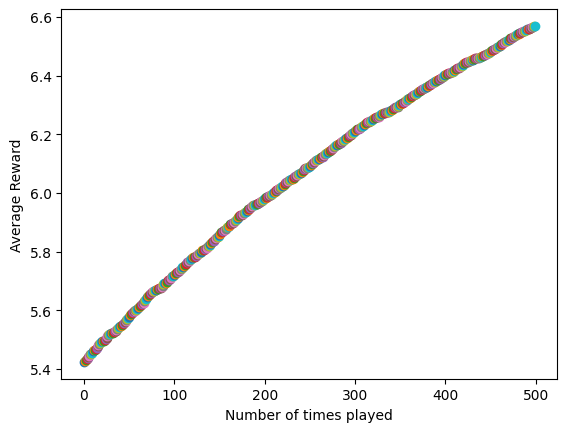

In [ ]:
plt.xlabel("Number of times played")
plt.ylabel("Average Reward")

#Epsilon-greedy algorithm
for i in range(500):
  if random.random()>eps:
    #greedy exploitation action eps=0.1,1-eps=0.9
    choice =bestArm(av) #call the method bestArm(action-value)
    thisAV=np.array([[choice,reward(arms[choice])]])#call the reward method
    av=np.concatenate((av,thisAV),axis=0)
  else: #exploration - Agent explores other arms
    choice=np.where(arms==np.random.choice(arms))[0][0] #choice,reward
    thisAV=np.array([[choice,reward(arms[choice])]]) #add to our action value memory
    #calculate the mean reward
  runningMean=np.mean(av[:,1])
  plt.scatter(i,runningMean)